In [ ]:
!pip install gym==0.17.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gym
import numpy as np

env = gym.make("CliffWalking-v0")



In [ ]:
# Set seed for experiment reproducibility
env.reset()
np.random.seed()

In [ ]:
env.reset()
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



The agent starts at the left end of the board with a sign X, and the only way to end the game is to reach the right end of the board with a sign T. And C represents the cliff area

In [ ]:
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(4)
State Space Discrete(48)




This table will have one row for each state and one column for each action. Our grid world has 48 (4 x 12) states and 4 actions are allowed, so the table would be 48 x 4.

There are 3x12 + 1 possible states. In fact, the agent cannot be at the cliff, nor at the goal (as this results in the end of the episode). It remains all the positions of the first 3 rows plus the bottom-left cell. The observation is simply the current position encoded as flattened index

In [ ]:
state = env.s
print("State:", state)

State: 36


In [ ]:
env.reset()

state = env.s
print("State:", state)

env.render()

State: 36
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



#Moving around

In [ ]:
action= 1

In [ ]:
state, reward, done, info = env.step(action)

In [ ]:
print(state, reward, done, info)

36 -100 False {'prob': 1.0}


1. The first item is the new state.

2. The second element is the reward. Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward.

3. The third element, in this case "False", tells us if the human arrived at the correct destination.

4. The fourth element is the probability, which in this context will always be 1.

In [ ]:
state, reward, done, info = env.step(3)

print("State:", state)

env.s = state

env.render()

State: 36
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



The initial rewards matrix is ​​called P, and it has dimension (48 x 4).

We can see the default reward values ​​assigned to the state of our illustration:

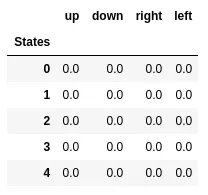

In [ ]:
env.P[36]

{0: [(1.0, 24, -1, False)],
 1: [(1.0, 36, -100, False)],
 2: [(1.0, 36, -1, False)],
 3: [(1.0, 36, -1, False)]}

1. The first number corresponds to the actions:
0: move up

1: move right

2: move down

3: move left

2. The second number corresponds to the probability, which in this case is always 1.

3. The third number is the next state, which we would be in if we took that action.

4. The fourth number is the reward. Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward.

5. The last element, in this case always "False", tells us if the human arrives at the correct destination.

Having the reward table predetermined, we can evaluate how our human behaves.

We create an agent that will perform 10 actions (we will iterate over the timestep variable, which will go up to 10); when it's done, we look at the total rewards/penalties received and whether it was able arrive at their destination or not

In [ ]:
env.s = 36

timestep, penalties, reward = 0, 0, 0

for timestep in range(10):

  action = env.action_space.sample() 
  state, reward, done, info = env.step(action) 

  if reward == -100:
      penalties += 1 

  timestep += 1
    
print("Timesteps taken: {}".format(timestep))
print("Penalties incurred: {}".format(penalties))
env.render() 

Timesteps taken: 10
Penalties incurred: 0
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T



In [ ]:
from IPython.display import clear_output


In [ ]:
from time import sleep

class bcolors:
    RED= '\u001b[31m'
    GREEN= '\u001b[32m'
    RESET= '\u001b[0m'



env.s = 36
  
timestep, penalties, reward = 0, 0, 0

done =False
while not done: 
  
  for timestep in range(10):
    action = env.action_space.sample() 
    state, reward, done, info = env.step(action) 
    
    if reward == -100:
      
      penalties += 1 
      
    timestep += 1



  # Print each step
  clear_output(wait=True)
  env.render()
  print("")
  if reward < 0:
    print(f"Recompensa actual: {bcolors.RED}{reward}{bcolors.RESET}")
  else:
    print(f"Recompensa actual: {bcolors.GREEN}{reward}{bcolors.RESET}")
    
    print('Estado actual', state)
    
    sleep(1) 


print("Timesteps taken: {}".format(timestep))
print("Penalties incurred: {}".format(penalties))

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x


Recompensa actual: -1
Timesteps taken: 10
Penalties incurred: 0


Our agent takes a long time to arrive to T, his right destination, also accumulating many penalties.

This is because the agent is not learning from its mistakes: at each moment it takes an action and receives a reward or penalty, but it has no memory of whether that action was optimal in that particular state.

Learning from experience is exactly the goal of Reinforcement Learning.

The Q-learning algorithm will be in charge of creating the "memory" of our agent.
The human will learn what is the optimal action in each state, in order to 


achieve its goal in the shortest possible time.

For this, we will need a table similar to the rewards table, which is called Q-table.

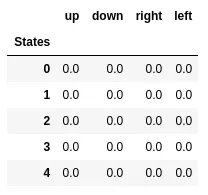

In [ ]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table[36]

array([0., 0., 0., 0.])

We define our greedy policy

In [ ]:
def greedy(epsilon,q_table,state,env):
    if rd.random() < epsilon:
        action=env.action_space.sample() #explorar
    else:
        action=np.argmax(q_table[state]) #explotar
    return action

In [ ]:
import random as rd
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1 # tasa de aprendizaje
gamma = 0.6 # tasa de descuento
epsilon = 0.1 # greedy policy

# For plotting metrics
all_timestep = []
all_penalties = []

episodes = 100000

for i in range(episodes):
    state = env.reset()

    timestep, penalties, reward = 0, 0, 0
    done = False
    
    while not done:
        action = greedy(epsilon,q_table,state,env) # aplicamos la greedy policy

        next_state, reward, done, info = env.step(action) # tomamos la acción elegida
        
        old_value = q_table[state, action] # en la Q-table, tomamos el valor Q de la acción elegida para el estado actual
        next_max = np.max(q_table[next_state]) # en la Q-table, tomamos el máximo entre los valores Q para el nuevo estado
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max) # actualizamos el valor Q
        q_table[state, action] = new_value

        if reward == -100:
            penalties += 1

        state = next_state
        timestep += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 99900
Training finished.



In [ ]:
q_table[22]

array([-2.3056, -1.96  , -1.96  , -2.3056])

Now that we have updated the Q-table, we can see how our agent behaves based on what it has learned.

 We no longer need to explore, so we change the greedy policy: the chosen action will always be the one with the highest Q-value:

In [ ]:


class bcolors:
    RED= '\u001b[31m'
    GREEN= '\u001b[32m'
    RESET= '\u001b[0m'



env.s = 36
  
timestep, penalties, reward = 0, 0, 0

done =False
while not done: 
  
  for timestep in range(10):
    action = np.argmax(q_table[state])
    state, reward, done, info = env.step(action) 
    
    if reward == -100:
      
      penalties += 1 
      
    timestep += 1



  # Print each step
  clear_output(wait=True)
  env.render()
  print("")
  if reward < 0:
    print(f"Recompensa actual: {bcolors.RED}{reward}{bcolors.RESET}")
  else:
    print(f"Recompensa actual: {bcolors.GREEN}{reward}{bcolors.RESET}")
    
    print('Estado actual', state)
    
    sleep(1) 


print("Timesteps taken: {}".format(timestep))
print("Penalties incurred: {}".format(penalties))

Streaming output truncated to the last 5000 lines.

Recompensa actual: -1
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  x
o  C  C  C  C  C  C  C  C  C  C  T


Recompensa actual: -1
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  x
o  C  C  C  C  C  C  C  C  C  C  T


Recompensa actual: -1
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  x
o  C  C  C  C  C  C  C  C  C  C  T


Recompensa actual: -1
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  x
o  C  C  C  C  C  C  C  C  C  C  T


Recompensa actual: -1
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  x
o  C  C  C  C  C  C  C  C  C  C  T


Recompensa actual: -1
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  x
o

The cliff walking problem is a classic reinforcement learning problem where an agent navigates a grid-world environment to reach a goal while avoiding falling off a cliff. Through this problem, we can learn valuable lessons that can be applied to many real-world scenarios, including project management.

Firstly, the problem teaches us about the importance of exploration vs. exploitation. In the cliff walking problem, the agent must decide whether to explore a new path or exploit a known path to reach the goal. Similarly, in project management, it is essential to balance exploration and exploitation to find new opportunities while maintaining efficiency.

Secondly, the problem highlights the trade-off between short-term and long-term gains. In the cliff walking problem, the agent might receive a reward for taking a shorter path, but it could lead to falling off the cliff in the long run. Similarly, in project management, it is essential to balance short-term and long-term gains to ensure that the project is successful in the long run.

Thirdly, the problem emphasizes the importance of learning from mistakes and failures. In the cliff walking problem, the agent might fall off the cliff and receive negative feedback, but it can use this experience to improve its decision-making in the future. Similarly, in project management, it is essential to learn from mistakes and failures to improve the project's overall performance.

Finally, the problem shows the importance of providing incentives and rewards to motivate team members. In the cliff walking problem, the agent's goal is to maximize its reward, which motivates it to take the optimal path to reach the goal. Similarly, in project management, providing the right incentives and rewards can motivate team members to work towards achieving project goals.

In conclusion, the cliff walking problem provides valuable insights into project management. By applying the lessons learned from the problem, we can improve decision-making, enhance project outcomes, and achieve success in many real-world scenarios.